In [1]:
# Connect Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/UCW/BUSI 651 - ML/FinalProject/Credit_Prediction.csv')

In [4]:
# Explore the dataset
print(data.head())  # Display the first few rows of the dataset
print(data.info())  # Display information about the dataset

   CLIENTNUM  Customer_Age Gender  Dependent_count Education_Level  \
0  768805383          45.0      M                3     High School   
1  818770008          49.0      F                5        Graduate   
2  713982108          51.0      M                3        Graduate   
3  769911858          40.0      F                4     High School   
4  709106358          40.0      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue            39.0   
1         Single  Less than $40K          Blue            44.0   
2        Married    $80K - $120K          Blue            36.0   
3            NaN  Less than $40K          Blue            34.0   
4        Married     $60K - $80K           NaN            21.0   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                       5.0                       1                      3   
1                       6.

In [5]:
# Data preprocessing
# Handling missing values (if any)
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)
data = data.dropna()

Missing Values:
 CLIENTNUM                      0
Customer_Age                   0
Gender                       101
Dependent_count                0
Education_Level                0
Marital_Status              1011
Income_Category                0
Card_Category               1011
Months_on_book               111
Total_Relationship_Count      10
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64


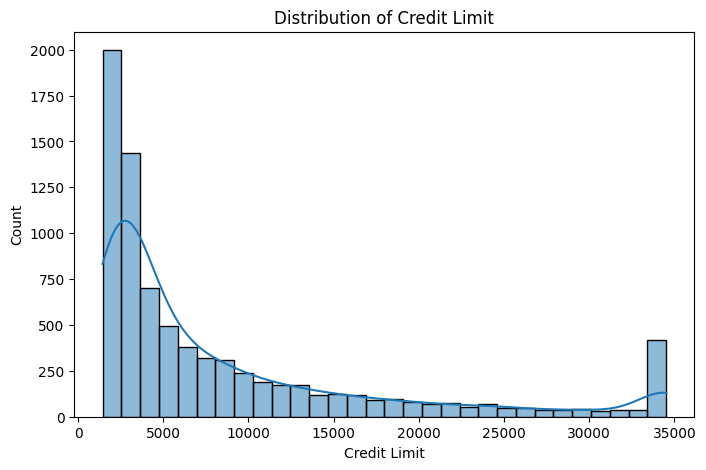

In [6]:
# Data visualization and exploration
# Example: Let's visualize the distribution of 'Credit_Limit' using a histogram
plt.figure(figsize=(8, 5))
sns.histplot(data['Credit_Limit'], bins=30, kde=True)
plt.xlabel('Credit Limit')
plt.ylabel('Count')
plt.title('Distribution of Credit Limit')
plt.show()

In [7]:
# Data preprocessing
# Example: Encoding categorical variables (e.g., 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category')
data = pd.get_dummies(data, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)

In [8]:
# Splitting the data into features (X) and target (y)
X = data.drop('Credit_Limit', axis=1)  # Replace 'Credit_Limit' with your target variable
y = data['Credit_Limit']

In [9]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Model training and evaluation
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = [LinearRegression(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    SVR(kernel='linear'),
    SVR(kernel='rbf'),
    MLPRegressor(),
    Lasso(),
    Ridge(),
    ElasticNet(),
    ExtraTreeRegressor(),
    AdaBoostRegressor(),DecisionTreeRegressor(), KNeighborsRegressor()]

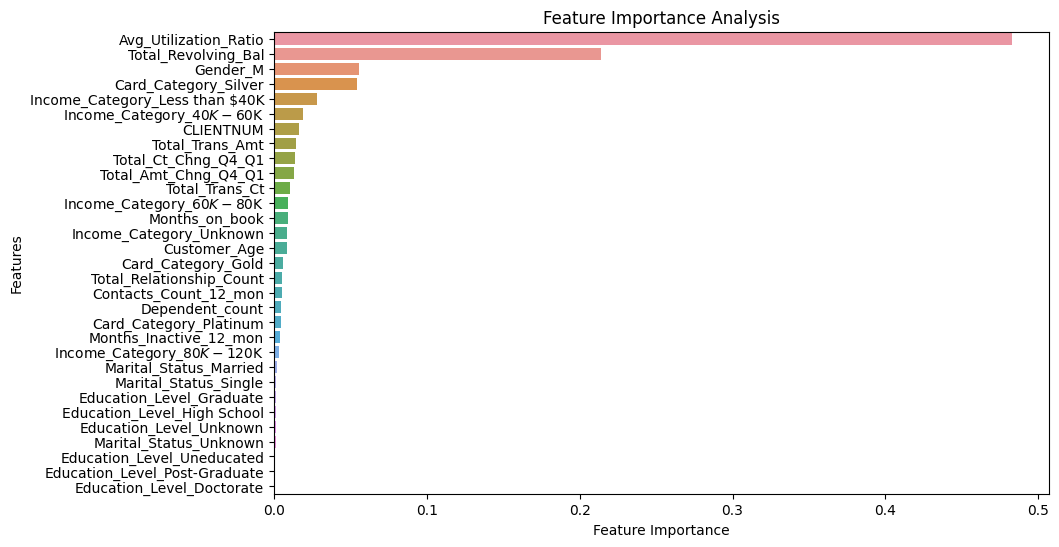

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
# Feature Importance Analysis
for model in models:
    model.fit(X_train, y_train)
    # Access the `feature_importances_` attribute of each model
    if isinstance(model, RandomForestRegressor):  # Perform feature importance analysis for RandomForestRegressor
        feature_importances = model.feature_importances_
        importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.xlabel('Feature Importance')
        plt.ylabel('Features')
        plt.title('Feature Importance Analysis')
        plt.show()

In [13]:
# Make predictions and evaluate the models
for model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Evaluate the model
    print(f'Model: {model.__class__.__name__}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print("=" * 40)

Model: LinearRegression
Mean Squared Error: 29969504.137690265
R-squared: 0.6541251404049091
Model: RandomForestRegressor
Mean Squared Error: 10059625.773651496
R-squared: 0.8839029289221659
Model: GradientBoostingRegressor
Mean Squared Error: 11350433.784937667
R-squared: 0.8690058509586254
Model: XGBRegressor
Mean Squared Error: 10471205.903730586
R-squared: 0.8791529264179802
Model: SVR
Mean Squared Error: 57688829.43180224
R-squared: 0.33421935550691007
Model: SVR
Mean Squared Error: 103533195.22225267
R-squared: -0.1948655939186188
Model: MLPRegressor
Mean Squared Error: 34803232.18996916
R-squared: 0.5983395990852499
Model: Lasso
Mean Squared Error: 29965608.631373115
R-squared: 0.654170098028976
Model: Ridge
Mean Squared Error: 29970742.56118581
R-squared: 0.6541108478910698
Model: ElasticNet
Mean Squared Error: 38113573.12103449
R-squared: 0.5601353064989014
Model: ExtraTreeRegressor
Mean Squared Error: 20884639.98383613
R-squared: 0.75897259130761
Model: AdaBoostRegressor
Mean